In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import scipy.stats

In [2]:
plt.style.use('ggplot')

In [3]:
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

In [4]:
# Calculate total flights per month
total_outbound_flights = outbound.groupby(['Month']).count()
total_outbound_flights = pd.DataFrame(total_outbound_flights['TailNum'])
total_outbound_flights = total_outbound_flights.rename(columns={'TailNum':'Outbound Flights'})

total_inbound_flights = inbound.groupby(['Month']).count()
total_inbound_flights = pd.DataFrame(total_inbound_flights['TailNum'])
total_inbound_flights = total_inbound_flights.rename(columns={'TailNum':'Inbound Flights'})

total_flights = pd.concat([total_outbound_flights, total_inbound_flights], axis=1, join_axes=[total_outbound_flights.index])
total_flights['Total Flights'] = total_flights.sum(axis=1)
total_flights = total_flights[['Total Flights']]

In [5]:
#Outbound Flight Delays
outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
total_outbound_delays = len(outbound_delays['FlightNum'])

monthly_outbound = outbound_delays.groupby(['Month']).sum()
m_outbound_sum = pd.DataFrame(monthly_outbound['DepDel15'])

#Inbound Flight Delays
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]
total_inbound_delays = len(inbound_delays['FlightNum'])

monthly_inbound = inbound_delays.groupby(['Month']).sum()
m_inbound_sum = pd.DataFrame(monthly_inbound['ArrDel15'])


In [6]:
merged = m_outbound_sum.join(m_inbound_sum)
merged['AllDelays'] = merged.sum(axis=1)
total_delays = pd.DataFrame(merged['AllDelays']).astype(int)

In [7]:
# Calculate percentage delayed flights per month

perc_delays = pd.concat([total_delays, total_flights], axis=1, join_axes=[total_delays.index])
perc_delays['Delay Percentage'] = round((perc_delays['AllDelays']/perc_delays['Total Flights'])*100, 2)
perc_delays = perc_delays[['Delay Percentage']]

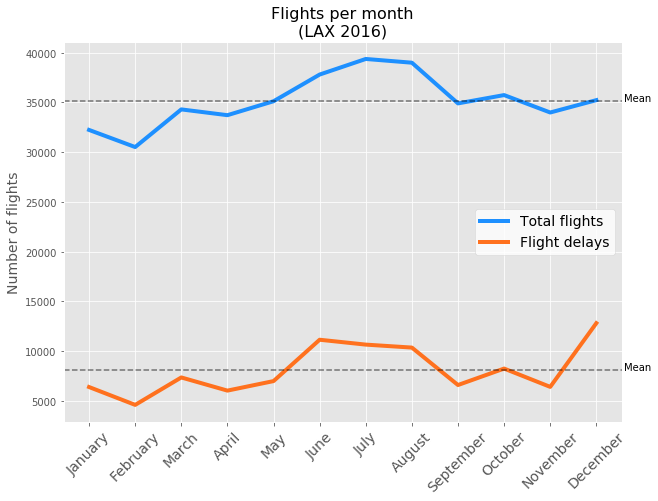

In [8]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]
mean_flight = np.mean(total_flights['Total Flights'])
mean_delay = np.mean(total_delays['AllDelays'])

plt.figure(figsize=(10,7))
plt.plot(x_axis, total_flights['Total Flights'], label='Total flights', linewidth=4,color='#1E90FF')
plt.plot(x_axis, total_delays['AllDelays'], label='Flight delays', linewidth=4,color='#ff711e')

plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Number of flights', size=14)
plt.title('Flights per month\n(LAX 2016)', size=16)
legend = plt.legend(loc=5, fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.axhline(y=mean_flight, color='k',linestyle='--', alpha=0.5)
plt.axhline(y=mean_delay, color='k',linestyle='--', alpha=0.5)
plt.text(11.6,mean_flight, 'Mean')
plt.text(11.6,mean_delay, 'Mean')

plt.savefig('images/flights_per_month.png', bbox_inches='tight')
plt.show()

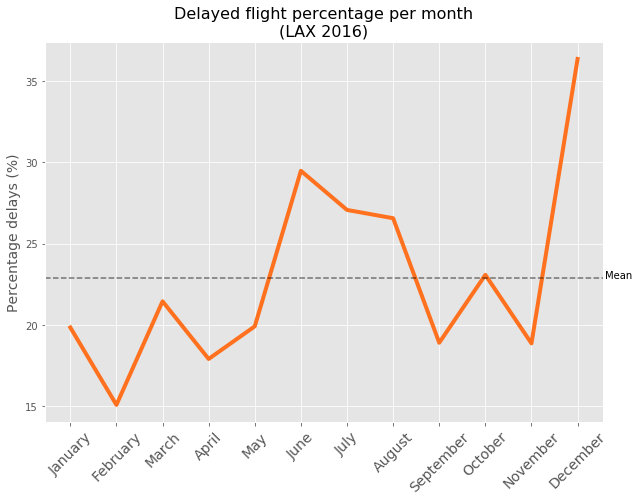

In [9]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]
mean_percent = np.mean(perc_delays['Delay Percentage'])

plt.figure(figsize=(10,7))
plt.plot(x_axis, perc_delays['Delay Percentage'], linewidth=4,color='#ff711e')
plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Percentage delays (%)', size=14)
plt.title('Delayed flight percentage per month\n(LAX 2016)', size=16)
plt.axhline(y=mean_percent, color='k', alpha=0.5, linestyle='--')
plt.text(11.6,mean_percent, 'Mean')

plt.savefig('images/flight_delay_percent.png', bbox_inches='tight')
plt.show()

In [10]:
# Test for normal distribution

z_flight,pval_flight = scipy.stats.normaltest(total_flights['Total Flights'])
if(pval_flight < 0.05):
    print("Total Flights: Not normal distribution")
elif(pval_flight >= 0.05):
    print("Total Flights: Normal distribution")
    
z_delay,pval_delay = scipy.stats.normaltest(total_delays['AllDelays'])
if(pval_delay < 0.05):
    print("Total Delays: Not normal distribution")
elif(pval_delay >= 0.05):
    print("Total Delays: Normal distribution")

Total Flights: Normal distribution
Total Delays: Normal distribution


C:\Users\stua8323\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


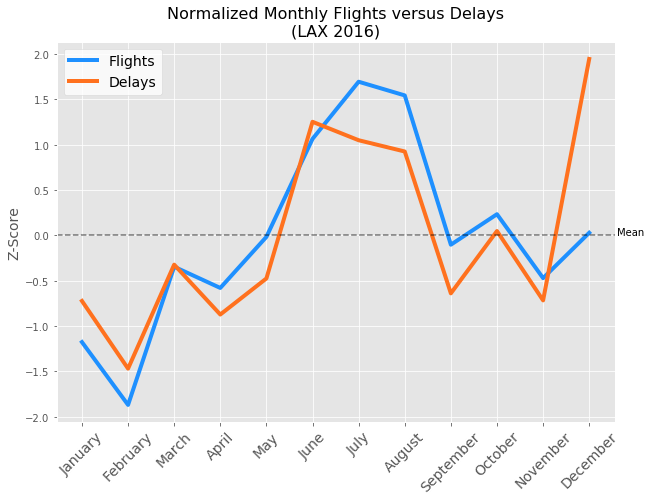

In [11]:
x_axis = np.arange(0,12,1)
months = calendar.month_name[1:13]

zscore_delay = scipy.stats.zscore(total_delays['AllDelays'])
zscore_flights = scipy.stats.zscore(total_flights['Total Flights'])

plt.figure(figsize=(10,7))

plt.plot(x_axis, zscore_flights, label='Flights',linewidth=4, color='#1E90FF')
plt.plot(x_axis, zscore_delay, label='Delays',linewidth=4, color='#ff711e')
plt.title('Normalized Monthly Flights versus Delays\n(LAX 2016)', size=16)
plt.xticks(x_axis, months, rotation=45, size=14)
plt.ylabel('Z-Score', size=14)
plt.axhline(0,color='k',alpha=0.5, linestyle='--')
plt.text(11.6,0, 'Mean')

legend = plt.legend(loc='best', fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('1')

plt.savefig('images/flight_delay_zscores.png', bbox_inches='tight')
plt.show()